<a href="https://colab.research.google.com/github/0Kyumy0/Stellar_Classification_Project/blob/main/stellarClasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECTIVE OF THIS PROJECT: classify if the stellar is a galaxy, star or quasar based on the characteristics given in the dataset.

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '/content/drive/MyDrive/DataScience/PROYECTO2/star_classification.csv'
df = pd.read_csv(filename)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Cleaning and exploration of the data

In [3]:
df.info() # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
df.duplicated().sum() # there are no duplicated rows

0

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


### Notas:
* Los valores de rerun_ID son el mismo en todas las filas, por lo que no tiene valor ni objetivo tenerlo, por lo cual lo eliminaré.
* Eliminaré la columna obj_ID ya que al ser identificadores para cada estelar, no tiene relación con otras columnas.

In [6]:
df['rerun_ID'].value_counts() # all the values are the same, so i'll delete it because it brings no value

301    100000
Name: rerun_ID, dtype: int64

In [7]:
df['class'].unique() # the objective column does have the three values correctly

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [8]:
# I changed the diferent types of stellars in the column 'class' to nominal values. 
# since this models will have the same three types of stellars
df['class'] = df['class'].replace({'GALAXY':0, 'QSO':1, 'STAR':2})
df['class'].unique()

array([0, 1, 2])

In [9]:
df = df.drop(columns=['rerun_ID', 'obj_ID'])

Why did i delete them?

* **obj_ID**: since it is an ID to the element it does not contribute to the model.

* **rerun_ID**: it doesn't have any correlation whatsoever with any columns. Also, according to what was observed previously, all the values are the same, so it does not add anything to the model.

## Correlation Matrix

In [10]:
df.head()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0,0.116123,6121,56187,842


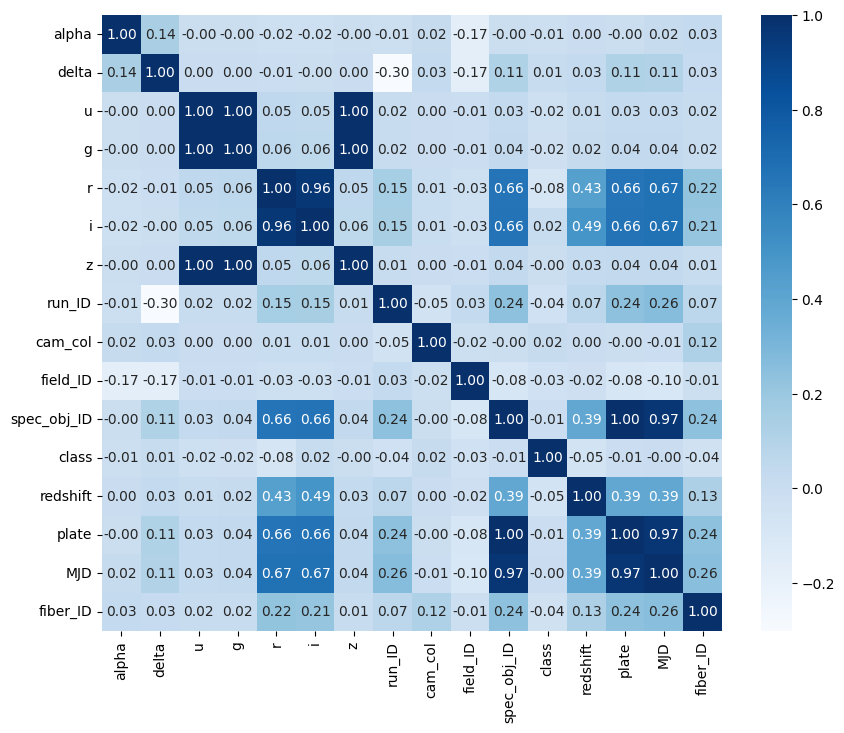

In [11]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8));
sns.heatmap(corr, cmap='Blues', annot=True, ax=ax, fmt='.2f');

According to what was observed in the correlation matrix, the correlation between them is quite varied. Therefore, it would be best to determine based on the results of the models which characteristics are truly relevant in the classification of stars.

In [12]:
class_quanty= df['class'].value_counts()

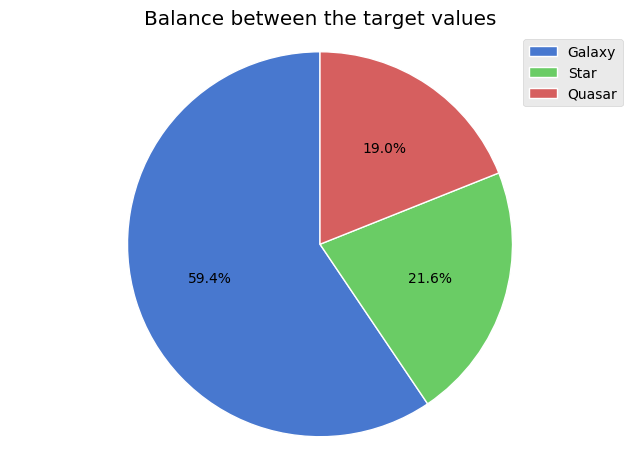

In [30]:
plt.style.use('seaborn-v0_8-muted')

fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)

label = ['Galaxy', 'Star', 'Quasar']

ax1.pie(class_quanty, 
        startangle=90,
        autopct="%1.1f%%",
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'});
    
ax1.set_title('Balance between the target values');
ax1.legend(label, loc='best');
ax1.axis('equal');

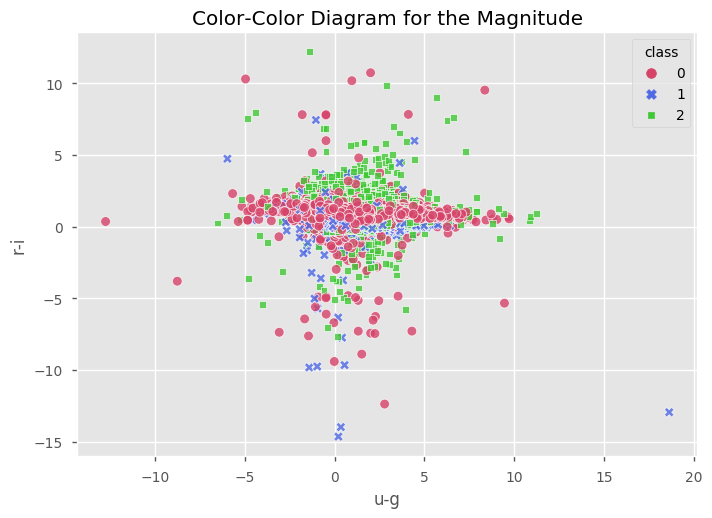

In [121]:
metrics_ug = []
metrics_ri = []

for i in range(len(df)):
  _u_g = df['u'][i] - df['g'][i]
  _r_i = df['r'][i] - df['i'][i]
  metrics_ug.append(_u_g)
  metrics_ri.append(_r_i)

palette = ['#D64369', '#4F68E3', '#41C836']

sns.scatterplot(x=metrics_ug, y=metrics_ri, 
                hue=df['class'], style=df['class'],
                palette=palette, alpha=0.8);

plt.xlabel('u-g');
plt.ylabel('r-i');
plt.title('Color-Color Diagram for the Magnitude');

La magnitud es una medida de la luminosidad de un objeto celeste, y se mide en una escala logarítmica inversa. Esto significa que cuanto más brillante sea un objeto, menor será su magnitud, y viceversa.

Cada filtro tiene una curva de respuesta diferente, lo que significa que la cantidad de luz que se detecta a través de cada filtro dependerá de la longitud de onda de la luz y de la curva de respuesta del filtro.

La diferencia de magnitud se calcula restando la magnitud del objeto medida en un filtro de la magnitud medida en otro filtro.

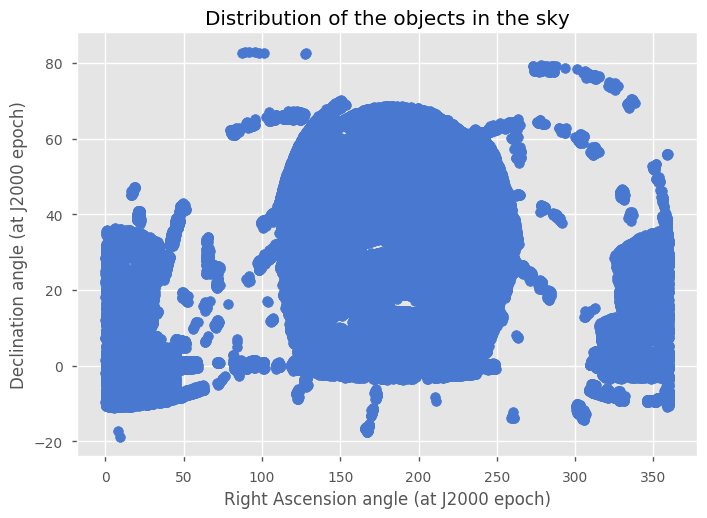

In [120]:
fig2 = plt.figure(dpi=100)
ax1 = fig2.add_subplot(1,1,1)

ax1.scatter(df['alpha'], df['delta']);
ax1.set_xlabel('Right Ascension angle (at J2000 epoch)');
ax1.set_ylabel('Declination angle (at J2000 epoch)');
ax1.set_title('Distribution of the objects in the sky');
